In [ ]:
%pip install memo

In [1]:
import numpy as np
from memo import memlist, memfile, memfunc, memweb, time_taken

data = []

@memfile(filepath="results.jsonl")
@memlist(data=data)
@time_taken()
def birthday_experiment(class_size, n_sim=1000):
    """Simulates the birthday paradox. Vectorized = Fast!"""
    sims = np.random.randint(1, 365 + 1, (n_sim, class_size))
    sort_sims = np.sort(sims, axis=1)
    n_uniq = (sort_sims[:, 1:] != sort_sims[:, :-1]).sum(axis = 1) + 1
    return {"est_prob": np.mean(n_uniq != class_size), "number": 42}

for size in range(2, 100):
    birthday_experiment(class_size=size, n_sim=1_000)

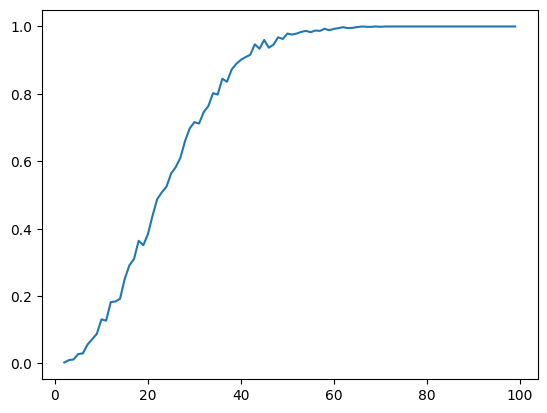

In [2]:
import pandas as pd
import matplotlib.pylab as plt

df = pd.DataFrame(data)
plt.plot(df['class_size'], df['est_prob']);

In [3]:
from memo import grid

settings = grid(
    class_size=range(2, 100),
    n_sim=[1_000, 10_000, 100_000]
)

for setting in settings:
    birthday_experiment(**setting)

In [4]:
from memo import Runner

In [5]:
%%time
Runner(backend="threading", n_jobs=4).run(birthday_experiment, settings)

Output()

CPU times: user 26.7 s, sys: 1.14 s, total: 27.8 s
Wall time: 8.95 s
